# GENOPYC TUTORIAL NOTEBOOK


In this tutorial we will explore some of the features of genopyc library

# Install the library 

In [ ]:
!pip install genopyc

# Import all the necessary libraries

In [2]:
import genopyc as gp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
from collections import Counter


# Download variants associated to Breast Carcinoma (EFO_0000305) from GWAS catalog

In [3]:
associations=gp.get_associations('EFO_0000305',verbose=True)
associations

querying associations... 

building the dataframe...


,variantid,p-value,risk_allele,RAF,beta,CI,mapped_gene,SE
0,rs6788895,9.0e-08,G,0.65,NaN,[1.13-1.31],[SIAH2],NaN
1,rs3750817,8.0e-08,T,0.49,NaN,[NR],[FGFR2],NaN
2,rs3803662,6.0e-19,T,0.27,NaN,[1.21-1.35],[TNRC9],NaN
3,rs13387042,1.0e-13,A,0.50,NaN,[1.14-1.26],[intergenic],NaN
4,rs10069690,1.0e-10,T,0.26,NaN,[1.13-1.25],[TERT],NaN
...,...,...,...,...,...,...,...,...
1861,chr5:44678534,6.0e-11,?,NaN,0.14352,[0.11-0.18],[],0.01871
1862,chr5:56042972,3.0e-09,?,NaN,0.19644,[0.14-0.26],[],0.03117
1863,chr6:151949582,4.0e-15,?,NaN,0.18754,[0.15-0.23],[],0.02143
1864,chr10:123333997,2.0e-21,?,NaN,0.18819,[0.15-0.22],[],0.01853


## Get Variant Positions for all the variants retrieved

In [5]:
variants=list(set(associations.variantid.tolist()))

In [4]:
variant_positions=gp.get_variant_position_many(variants)

total number of chunks: 7
chunk 0 processed
chunk 1 processed
chunk 2 processed
chunk 3 processed
Couldn't Retrieve Position for variant rs8176636
Couldn't Retrieve Position for variant rs1570070540
chunk 4 processed
chunk 5 processed
chunk 6 processed


## - The result is a list of tuples with shape (variantid, chromosome, genomic coordinates)

In [5]:
variant_positions[:10]

[('rs643506', '11', 111765903),
 ('rs141752671', '11', 103745837),
 ('rs62331150', '4', 105147856),
 ('rs111549985', '5', 81972251),
 ('rs2901157', '10', 117502854),
 ('rs1154723', '20', 11399194),
 ('rs9952980', '18', 45308832),
 ('rs2912780', '10', 121577603),
 ('rs10411161', '19', 51869723),
 ('rs6752414', '2', 120667763)]

 - A first approach could be to investigate the elements that lie in a specific region surrounding variant of interest, this can be easily done with get_ov_elements() function. It accepts genomic coordinates chromosome, start and end of a specific genomic region and it returns the elements that overlap it. The feature keyword is a list containing the specific features we want to retrieve. Refer to the [Documentation](https://rest.ensembl.org/documentation/info/overlap_region) from ensembl in order to have a full list of possible features that can be retrieved.
 
- Here I will inspect a region of 500 bp arount the rsid rs2901157 retrieving genes and motif features of that genomic area

In [89]:
rs2901157_chr=10
rs2901157_genomic_location=117502854
window=500
genomic_area_start=rs2901157_genomic_location-window//2
genomic_area_end=rs2901157_genomic_location+window//2

overlapping_elements=gp.get_ov_region(rs2901157_chr,genomic_area_start,genomic_area_end,features=['regulatory','gene','motif'])


In [90]:
overlapping_elements[:10]


[{'start': 117502909,
  'id': 'ENSR00000417087',
  'strand': 0,
  'description': 'Predicted enhancer region',
  'bound_end': 117504155,
  'source': 'Regulatory_Build',
  'feature_type': 'regulatory',
  'end': 117504155,
  'seq_region_name': '10',
  'bound_start': 117502909},
 {'gene_id': 'ENSG00000229847',
  'seq_region_name': '10',
  'end': 117545068,
  'logic_name': 'havana_homo_sapiens',
  'assembly_name': 'GRCh38',
  'feature_type': 'gene',
  'source': 'havana',
  'external_name': 'EMX2OS',
  'version': 9,
  'canonical_transcript': 'ENST00000450314.6',
  'biotype': 'lncRNA',
  'id': 'ENSG00000229847',
  'strand': -1,
  'description': 'EMX2 opposite strand/antisense RNA [Source:HGNC Symbol;Acc:HGNC:18511]',
  'start': 117473215},
 {'seq_region_name': '10',
  'end': 117502931,
  'stable_id': 'ENSM00238577010',
  'binding_matrix_stable_id': 'ENSPFM0067',
  'transcription_factor_complex': 'E2F1::ELK1',
  'feature_type': 'motif',
  'score': 5.22184845355,
  'strand': 1,
  'start': 11750

- The result is a list of elements that are overlapping this area,in json format, we can iterate over the results to filter them. For example we can retrieve all the motifs of TFBS in the area. You can learn more about [motifs](https://www.ensembl.info/2018/10/15/new-ensembl-motif-features/) and [regulatory features](https://www.ensembl.org/info/genome/funcgen/index.html) in the official Ensembl documentation.



In [43]:
for oe in overlapping_elements[:10]:
    if oe['feature_type']=='motif':
        print(f"binding_matrix_stable_id: {oe['binding_matrix_stable_id']}, transcription_factor_complex: {oe['transcription_factor_complex']}")

binding_matrix_stable_id: ENSPFM0067, transcription_factor_complex: E2F1::ELK1
binding_matrix_stable_id: ENSPFM0506, transcription_factor_complex: TEAD4::SPIB,TEAD4::ELF1,TEAD4::ELK1
binding_matrix_stable_id: ENSPFM0217, transcription_factor_complex: GCM1::ELF1
binding_matrix_stable_id: ENSPFM0306, transcription_factor_complex: HOXB2::ELF1
binding_matrix_stable_id: ENSPFM0085, transcription_factor_complex: EBF1
binding_matrix_stable_id: ENSPFM0252, transcription_factor_complex: GCM1::TBX21
binding_matrix_stable_id: ENSPFM0339, transcription_factor_complex: HOXD12::EOMES
binding_matrix_stable_id: ENSPFM0122, transcription_factor_complex: ETV2::GSC2,ERF::PITX1


# Run VEP to investigate variant consequences

With the function gp.VEP we can programmatically run VEP to investigate SNP consequences

In [45]:
trans_rsid,reg_rsid,inter_rsid,motif_rsid=gp.VEP(variants)

total number of chunks: 7
chunk 0 processed
chunk 1 processed
chunk 2 processed
chunk 3 processed
chunk 4 processed
chunk 5 processed
chunk 6 processed


In [46]:
rsid_consequences=sum([tup[1] for tup in trans_rsid]+[tup[1] for tup in reg_rsid]+[tup[1] for tup in inter_rsid]+[tup[1] for tup in motif_rsid],[])

## Visualize the results

Te following chunck of code is for visualizingthe result of VEP with a piechart

In [85]:
def PlotVEPResults(list_of_variant_effects):
    data=dict(Counter(list_of_variant_effects))
    counts=list(data.values())
    percentages = [(val/sum(counts))*100 for val in counts]
    names=data.keys()


    legend_labels=['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(names, percentages)]

    colors=plt.cm.tab20c.colors

    fig,ax=plt.subplots(figsize=(20,10))
    patches,text=ax.pie(data.values(),
          colors = colors,
          textprops={'fontsize': 12})


    ax.legend(patches, legend_labels, bbox_to_anchor=(1,1.050), loc="upper left",fontsize=12)
    
    fig.suptitle("VEP RESULTS",fontsize=15)
    plt.tight_layout()
    plt.show()

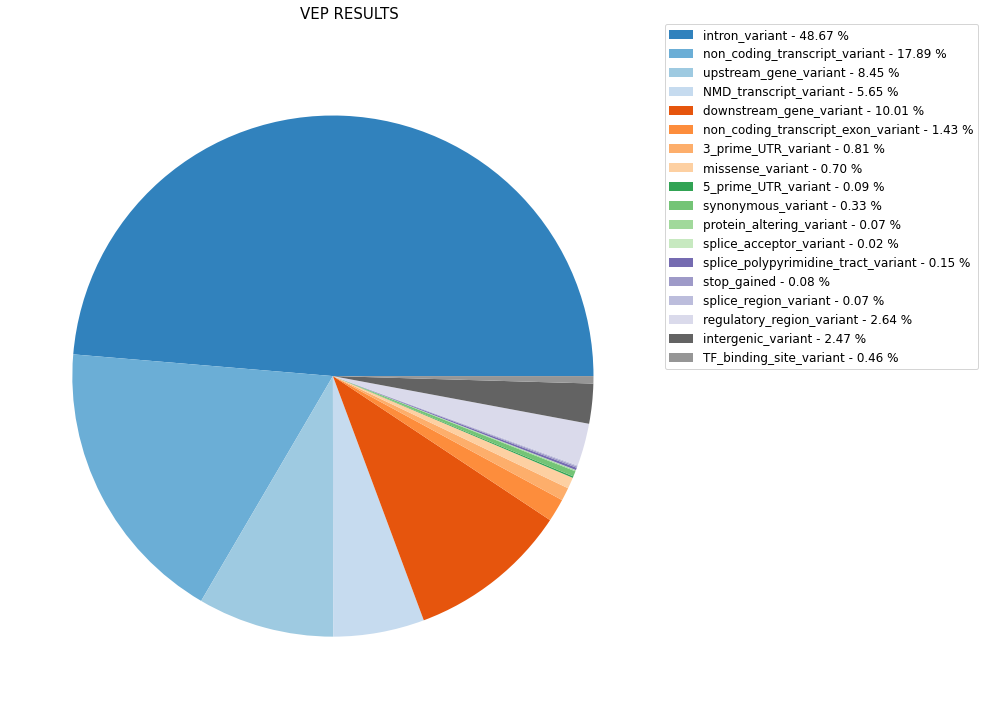

In [86]:
PlotVEPResults(rsid_consequences)

## It would be interesting to select the variants that have been detected to have a severed effect (stop gained or missense) and inspect the haplotype by retrieving all the variants in LD above a certain threshold e.g. 0.8


In [69]:
severe_effects=['missense_variant','stop_gained']

severe_rsids=[]
for (rsid,effects,biotype,gene) in trans_rsid:
    for effect in effects:
        if effect in severe_effects:
            severe_rsids.append(rsid)

severe_rsids=list(set(severe_rsids))
print(severe_rsids[:10], '\n\n' ,"total number of severe rsids = ",len(severe_rsids))

['rs35273427', 'rs9379084', 'rs11205303', 'rs13195401', 'rs3206824', 'rs8100241', 'rs17879961', 'rs3815308', 'rs7535752', 'rs3184504'] 

 total number of severe rsids =  27


## retrieve variants in LD above 0.6 for every variant in severe_rsids

In [70]:
ld_variants={rsid:gp.get_variants_in_LD(rsid,0.8) for rsid in severe_rsids }

In [74]:
ld_variants['rs13195401'][:20]

['rs34605993',
 'rs75782365',
 'rs13201782',
 'rs139332558',
 'rs13198716',
 'rs35076545',
 'rs34781270',
 'rs45527431',
 'rs41266839',
 'rs71557345',
 'rs13220261',
 'rs3823158',
 'rs34107459',
 'rs13190739',
 'rs67777156',
 'rs72843784',
 'rs146863150',
 'rs13220522',
 'rs10484439',
 'rs3734543']

# Running VEP running HGVS notation

So far we have worked with rsids, however a single rsid can correspond to more than one substitution. From GWAS catalog however we have the precise information of the risk allele and we should use this information. For doing this we will need to write variants in HGVS format since a single rsid can correspond to more than one substitution.

An example of HGVS notation is 9:g.22125504G>C where:

- 9 is the chromosome
- g means genome position
- 22125504 is the chromosome position
- G and C  are the ref and alternative allele

In [6]:
# We miss the info of the ancestral allele so we will get this information through variant_info function
variant_info=gp.get_variant_info_many(variants)

total number of chunks: 7
chunk 0 processed
chunk 1 processed
chunk 2 processed
chunk 3 processed
chunk 4 processed
chunk 5 processed
chunk 6 processed


In [7]:
variant_risk_alleles=dict(zip(associations.variantid.tolist(),[ra for ra in associations.risk_allele.tolist()]))
variant_genomic_locations=dict(zip([tup[0] for tup in variant_positions],[tup[2] for tup in variant_positions]))
variant_chromosomes=dict(zip([tup[0] for tup in variant_positions],[tup[1] for tup in variant_positions]))
variant_mappings=dict(zip(variant_info.keys(),[info['mappings'] for info in variant_info.values()]))

## Once got all the mappings for each rsid we can see that for a single rsid we can have more than one nucleotide substitution. The strategy here is to keep the ancestral allele that is most represented.

In [8]:
def most_frequent(List):
    return max(set(List), key = List.count)


variant_ancestral_alleles={}
for rsid,mappings in variant_mappings.items():
    if len(mappings)>1:
        list_of_alleles=[]
        for element in mappings:
            ref_allele=element['allele_string'].split('/')[0]
            list_of_alleles.append(ref_allele)        
        try:
            variant_ancestral_alleles[rsid]=most_frequent(list_of_alleles)
        except Exception as error:
            print(f'Error for rsid {rsid}: ' + repr(error))
    else:
        try:
            ref_allele=mappings[0]['allele_string'].split('/')[0]
            variant_ancestral_alleles[rsid]=mappings[0]['ancestral_allele']
        except Exception as error:
            print(f'Error for rsid {rsid}: ' + repr(error) + ' MAPPINGS = ' + str(mappings))

variant_ancestral_alleles={k:v for k,v in variant_ancestral_alleles.items() if v !=None}
            


Error for rsid rs8176636: IndexError('list index out of range') MAPPINGS = []
Error for rsid rs1570070540: IndexError('list index out of range') MAPPINGS = []


## we couldn't retreive mappings for 2 variants. Now we will merge all the information retrieved and we will convert the variant in HGVS notation

In [9]:
hgvs_idlist=[]

for variant in associations.variantid.tolist():
    
    try:
        hgvs_notation=str(variant_chromosomes[variant])+':g.'+str(variant_genomic_locations[variant])+str(variant_ancestral_alleles[variant])+'>'+str(variant_risk_alleles[variant])
        hgvs_idlist.append(hgvs_notation)
    except Exception as error:
        print(f'Error for rsid {variant}: ' + repr(error))


Error for rsid rs11249433: KeyError('rs11249433')
Error for rsid rs12906542: KeyError('rs12906542')
Error for rsid rs11249433: KeyError('rs11249433')
Error for rsid rs115707823: KeyError('rs115707823')
Error for rsid rs115392158: KeyError('rs115392158')
Error for rsid rs147527678: KeyError('rs147527678')
Error for rsid rs11907546: KeyError('rs11907546')
Error for rsid rs147680653: KeyError('rs147680653')
Error for rsid rs115707823: KeyError('rs115707823')
Error for rsid rs115392158: KeyError('rs115392158')
Error for rsid rs147527678: KeyError('rs147527678')
Error for rsid rs11907546: KeyError('rs11907546')
Error for rsid rs11374964: KeyError('rs11374964')
Error for rsid rs66823261: KeyError('rs66823261')
Error for rsid rs11374964: KeyError('rs11374964')
Error for rsid chr17:29230520: KeyError('chr17:29230520')
Error for rsid rs11249433: KeyError('rs11249433')
Error for rsid rs71557345: KeyError('rs71557345')
Error for rsid rs35951924: KeyError('rs35951924')
Error for rsid rs202049448: 

## We can see that we obtained a bunch of error because for many snps the information are missing, we can check for how many snps we couldn't retrieve the information

In [10]:
print(f"""we started with {len(set(associations.variantid.tolist()))} ids, 
      we were able to transform in hgvs notation {len(set(hgvs_idlist))})""")

we started with 1275 ids, 
      we were able to transform in hgvs notation 1076)


## Run [VEP](https://www.ensembl.org/Tools/VEP) from command line

In [17]:
trans,reg,inter,motif=gp.HGVS_VEP(hgvs_idlist)

total number of chunks: 9
chunk 0 processed
chunk 1 processed
chunk 2 processed
chunk 3 processed
chunk 4 processed
chunk 5 processed
chunk 6 processed
chunk 7 processed
chunk 8 processed
CPU times: user 314 ms, sys: 16.9 ms, total: 331 ms
Wall time: 6min 57s


In [44]:
motif[:10]

[('12:g.28021884C>T', ['TF_binding_site_variant'], ['TFAP4::MAX'], -0.066),
 ('1:g.113905767C>T', ['TF_binding_site_variant'], ['GCM1::ELF1'], -0.006),
 ('12:g.28021884C>T', ['TF_binding_site_variant'], ['TFAP4::MAX'], -0.066),
 ('6:g.28958443G>C',
  ['TF_binding_site_variant'],
  ['XBP1', 'CREB3', 'CREB3L1'],
  -0.117),
 ('6:g.28958443G>C', ['TF_binding_site_variant'], ['CREB3L1'], -0.121),
 ('7:g.130982362C>T', ['TF_binding_site_variant'], ['TFAP2C::MAX'], -0.037),
 ('7:g.130982362C>T', ['TF_binding_site_variant'], ['GCM1::MAX'], 0.007),
 ('7:g.130982362C>T', ['TF_binding_site_variant'], ['GCM2::MAX'], -0.027),
 ('7:g.130982362C>T', ['TF_binding_site_variant'], ['GCM1::MAX'], -0.028),
 ('7:g.130982362C>T', ['TF_binding_site_variant'], ['TFAP2C::MAX'], -0.003)]

The result is a list of tuple with that reports every effect for each variant. VEP separates the effects in transcript effects, regulatory effects, non coding effects and regulatory motif effects. Every result is separated and stored in different variables.

## Plot the results

Retrieve the consequence names 

In [76]:
consequences=sum([tup[1] for tup in trans]+[tup[1] for tup in reg]+[tup[1] for tup in inter]+[tup[1] for tup in motif],[])

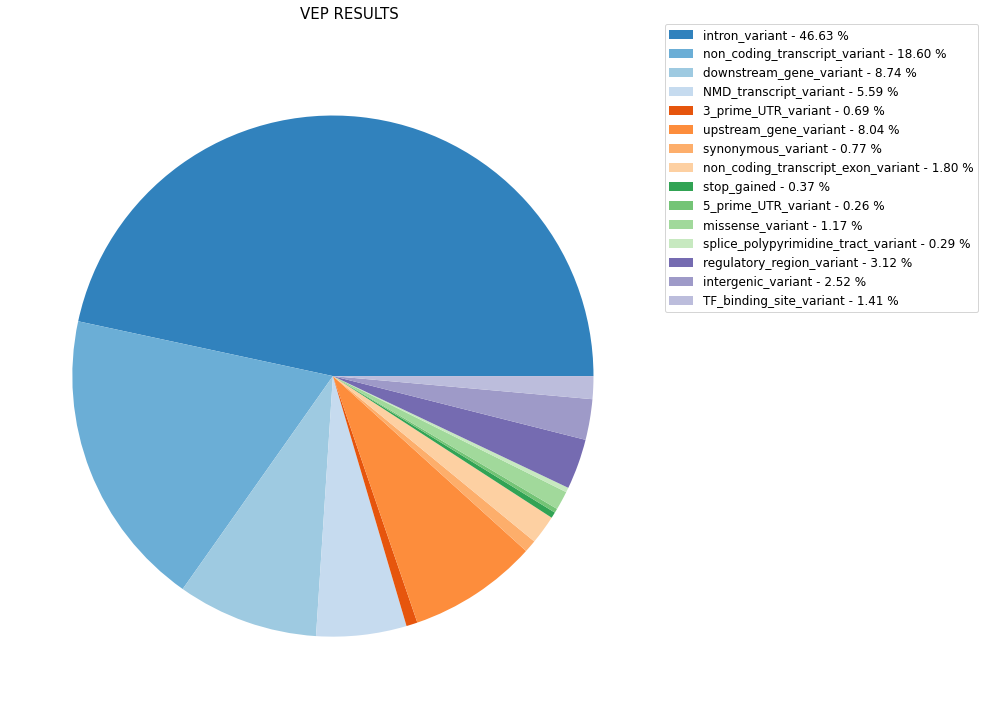

In [87]:
PlotVEPResults(consequences)

The majority of the variants falls in intronic regions so is not clear which would be the effect on transcripts. However there are also missense variants and stop gained variants that could hinder the function of a specific gene. Finally, expecially for complex traits such as breast cancer, it would be interesting to inspect the effect of these variant on specific neighbouring genes. In fact, most likely, the variants will have a regulatory effect, affecting trnscription factor binding sites, enhanchers or CTCF. 

<b> One possible approach could be to investigate the mapped genes and see what are the pathways that could be affected by these variants

# Find the positions of the genes mapped to specific variants


In [17]:
mapped_genes=sum(associations.mapped_gene.tolist(),[])
mapped_genes=[gene for gene in mapped_genes if gene !="intergenic"]
mapped_genes[:10]

['ZNF365',
 'FGFR2',
 'TOX3',
 'MRPS30',
 'FGFR2',
 'MAP3K1',
 'LSP1',
 'TNRC9',
 'TOX3',
 'FGFR2']

## Map Gene Symbol to Ensemble ID

For this task we will use another library named <b>[biomapy](https://pypi.org/project/biomapy/)

In [ ]:
!pip install biomapy

In [18]:
import biomapy as bp

mapped_genes_ens=bp.gene_mapping_many(mapped_genes,'symbol','ensembl')
mapped_genes_ens = list(filter(None,mapped_genes_ens))
mapped_genes_ens[:10]

['ENSG00000138311',
 'ENSG00000066468',
 'ENSG00000103460',
 'ENSG00000112996',
 'ENSG00000066468',
 'ENSG00000095015',
 'ENSG00000130592',
 'ENSG00000103460',
 'ENSG00000066468',
 'ENSG00000166147']

## Retrieve the position of all the genes

In [19]:
gene_positions=gp.get_gene_position_many(mapped_genes_ens)
gene_positions[:10]

total number of chunks: 3
chunk 0 processed
Couldn't retrieve position for gene ENSG00000129682
Couldn't retrieve position for gene ENSG00000129675
chunk 1 processed
chunk 2 processed


[('ENSG00000105656', 19, 18442663, 18522116),
 ('ENSG00000151715', 11, 129815848, 129860003),
 ('ENSG00000166147', 15, 48408313, 48645721),
 ('ENSG00000043039', 11, 129375848, 129452279),
 ('ENSG00000093144', 6, 127288712, 127343609),
 ('ENSG00000091831', 6, 151656691, 152129619),
 ('ENSG00000228408', 6, 149217926, 149245554),
 ('ENSG00000164379', 6, 1312098, 1314758),
 ('ENSG00000198807', 14, 36657568, 36679362),
 ('ENSG00000033867', 3, 27372721, 27484420)]

# Lift Coordinates

Genopyc give the possibility to lift coordinates, this can be useful for a small amount of data. For bigger queries refer to [ensembl](https://www.ensembl.org/Homo_sapiens/Tools/AssemblyConverter) or [UCSC](https://genome.ucsc.edu/cgi-bin/hgLiftOver) dedicated tools.

In [20]:
g37_gene_positions=[(gene,gp.grch_liftover(chromosome,start,end,source='GRCh38',target='GRCh37')) for (gene,chromosome,start,end) in gene_positions]

g37_gene_positions[:10]

[('ENSG00000105656', (19, 18553473, 18632926)),
 ('ENSG00000151715', (11, 129685743, 129729898)),
 ('ENSG00000166147', (15, 48700510, 48937918)),
 ('ENSG00000043039', (11, 129245743, 129322174)),
 ('ENSG00000093144', (6, 127609857, 127664754)),
 ('ENSG00000091831', (6, 151977826, 152450754)),
 ('ENSG00000228408', (6, 149539062, 149566690)),
 ('ENSG00000164379', (6, 1312333, 1314993)),
 ('ENSG00000198807', (14, 37126773, 37148567)),
 ('ENSG00000033867', (3, 27414212, 27525911))]

One Interesting approach could be to investigate expression quantitative trait loci (eqtls) for a given variant. 
These studies correlate genetic variations with the altered expression of a gene, more likely the variation have an effect on the expression of that specific candidate.

# Eqtls

Genopyc allows you to retrieve all the eqtls of a given variant the code. Data are fetched from [EBI](https://www.ebi.ac.uk/eqtl/). [Documentation](https://www.ebi.ac.uk/eqtl/api-docs/#accessing-the-api) available.

In [9]:
eqtls_dict={rsid:gp.get_eqtl_df(rsid) for rsid in variants[:10]}

'_embedded' {'message': 'Bad request. Could not interpret variant ID format from the value provided: chr22:39359355', 'error': 'Bad User Request', 'status': 400}
'_embedded' {'message': 'Bad request. Could not interpret variant ID format from the value provided: chr10:123340431', 'status': 400, 'error': 'Bad User Request'}


In [15]:
eqtls_dict['rs6557160']

,variantid,p_value,log_pval,beta,alt,gene_id,tissue,study_id
0,rs6557160,2.983820e-03,2.525227,0.141121,C,ENSG00000120262,CL_0002057,BLUEPRINT
1,rs6557160,2.284750e-04,3.641161,0.138991,C,ENSG00000120262,UBERON_0009834,BrainSeq
2,rs6557160,2.330520e-06,5.632547,0.190703,C,ENSG00000120262,UBERON_0001013,FUSION
3,rs6557160,1.378740e-03,2.860518,0.110726,C,ENSG00000120262,UBER_0010414,GTEx_V8
4,rs6557160,2.744960e-04,3.561464,0.155806,C,ENSG00000120262,UBER_0002369,GTEx_V8
5,rs6557160,1.786010e-04,3.748116,0.311096,C,ENSG00000120262,UBER_0009834,GTEx_V8
6,rs6557160,2.652030e-06,5.576422,0.407141,C,ENSG00000120262,UBER_0002038,GTEx_V8
7,rs6557160,4.975410e-03,2.303171,-0.178601,C,ENSG00000146476,UBER_0006330,GTEx_V8
8,rs6557160,2.253510e-03,2.647141,-0.191794,C,ENSG00000120254,UBER_0000007,GTEx_V8
9,rs6557160,2.607860e-03,2.583716,-0.046449,C,ENSG00000181472,CL_0002057,Quach_2016


# Overlapping Elements

Genopyc allows the user to retrieve the elements in a genomic area (band, gene, transcript, cds, exon, repeat, simple, misc, variation, somatic_variation, structural_variation, somatic_structural_variation, constrained, regulatory, motif, other_regulatory, array_probe, mane) 

In [5]:
genes_in_the_region = gp.get_ov_region(4,140424943,140624564,features=['gene'])
genes_in_the_region

[{'external_name': 'CLGN',
  'id': 'ENSG00000153132',
  'end': 140427661,
  'start': 140388453,
  'gene_id': 'ENSG00000153132',
  'assembly_name': 'GRCh38',
  'description': 'calmegin [Source:HGNC Symbol;Acc:HGNC:2060]',
  'feature_type': 'gene',
  'source': 'ensembl_havana',
  'strand': -1,
  'seq_region_name': '4',
  'version': 13,
  'logic_name': 'ensembl_havana_gene_homo_sapiens',
  'canonical_transcript': 'ENST00000325617.10',
  'biotype': 'protein_coding'},
 {'description': 'MGAT4 family member D [Source:HGNC Symbol;Acc:HGNC:43619]',
  'feature_type': 'gene',
  'source': 'ensembl_havana',
  'strand': -1,
  'seq_region_name': '4',
  'gene_id': 'ENSG00000205301',
  'assembly_name': 'GRCh38',
  'biotype': 'protein_coding',
  'version': 12,
  'canonical_transcript': 'ENST00000511113.6',
  'logic_name': 'ensembl_havana_gene_homo_sapiens',
  'external_name': 'MGAT4D',
  'id': 'ENSG00000205301',
  'end': 140498377,
  'start': 140442262},
 {'id': 'ENSG00000280262',
  'end': 140501330,
  

In [7]:
# We will prettify the results in order to get a Pandas dataframe for only the protein coding genes

protein_coding_info = [(r['external_name'],r['id'],r['biotype']) for r in genes_in_the_region if r['biotype'] == 'protein_coding']

genes_in_the_region_df = pd.DataFrame(protein_coding_info,columns=['geneID','ensID','biotype'])
genes_in_the_region_df

,geneID,ensID,biotype
0,CLGN,ENSG00000153132,protein_coding
1,MGAT4D,ENSG00000205301,protein_coding
2,ELMOD2,ENSG00000179387,protein_coding
3,UCP1,ENSG00000109424,protein_coding
4,TBC1D9,ENSG00000109436,protein_coding


## The same can be done with rsids

In [2]:
rsids_in_the_region = gp.get_ov_region(7,32860000,32870000,features=['variation'])
rsids_in_the_region[:10]

[{'feature_type': 'variation',
  'clinical_significance': [],
  'end': 32860001,
  'seq_region_name': '7',
  'start': 32860001,
  'alleles': ['T', 'C'],
  'assembly_name': 'GRCh38',
  'consequence_type': 'intergenic_variant',
  'id': 'rs1411072131',
  'strand': 1,
  'source': 'dbSNP'},
 {'start': 32860002,
  'consequence_type': 'intergenic_variant',
  'assembly_name': 'GRCh38',
  'alleles': ['G', 'A'],
  'id': 'rs1054004565',
  'source': 'dbSNP',
  'strand': 1,
  'feature_type': 'variation',
  'clinical_significance': [],
  'end': 32860002,
  'seq_region_name': '7'},
 {'start': 32860003,
  'assembly_name': 'GRCh38',
  'alleles': ['T', 'TT'],
  'consequence_type': 'intergenic_variant',
  'id': 'rs1468441306',
  'strand': 1,
  'source': 'dbSNP',
  'feature_type': 'variation',
  'clinical_significance': [],
  'end': 32860003,
  'seq_region_name': '7'},
 {'assembly_name': 'GRCh38',
  'alleles': ['TTTT', 'TT'],
  'consequence_type': 'intergenic_variant',
  'start': 32860006,
  'source': 'db

In [5]:
# We will prettify the results in order to get a Pandas dataframe

variants = [(r['id'],r['alleles'],r['consequence_type']) for r in rsids_in_the_region ]

variants_df = pd.DataFrame(variants,columns=['rsids','alleles','consequence_type'])
variants_df

,rsids,alleles,consequence_type
0,rs1411072131,"[T, C]",intergenic_variant
1,rs1054004565,"[G, A]",intergenic_variant
2,rs1468441306,"[T, TT]",intergenic_variant
3,rs1171703244,"[TTTT, TT]",intergenic_variant
4,rs894063101,"[C, T]",intergenic_variant
...,...,...,...
2406,rs1283024793,"[T, A]",missense_variant
2407,rs776120252,"[C, T]",synonymous_variant
2408,rs763201871,"[G, A, T]",missense_variant
2409,rs769102336,"[T, A]",missense_variant


# Linkage Disequlibrium 

Genopyc allows to work with variants in Linkage disequilibrium in different ways. The first and probably most common way is to, given a set of variants, calculate the LD matrix between them. For this, it exploits [LDlink](https://ldlink.nih.gov/?tab=home) tool. This function needs a token that can be obtained by [registering](https://ldlink.nci.nih.gov/?tab=apiaccess) in the website. Let's calculate the LD among all the TF_binding_site_variant that we just retrieved. It accept maximum 1000 rsids.

In [7]:
rsids = variants_df.rsids.tolist()[:1000]

ldm = gp.GetLDMatrix(rsids,token=#token)

#The token can be obtained in the link above

/root/miniconda3/envs/KNE/lib/python3.10/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ldlink.nci.nih.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [8]:
ldm

,rs534746960,rs116426673,rs138336189,rs1313961699,rs1318977291,rs191719768,rs1279761447,rs181788040,rs72617567,rs564043586,...,rs745408164,rs1194834457,rs1583764594,rs142915624,rs535989094,rs553991139,rs78635020,rs190621051,rs181770131,rs543311272
RS_number,,,,,,,,,,,,,,,,,,,,,
rs534746960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0
rs116426673,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0
rs138336189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0
rs1313961699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0
rs1318977291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rs553991139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055,0.0,...,0.000,0.000,0.000,0.0,0.0,1.000,0.001,0.0,0.0,0.0
rs78635020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009,0.0,...,0.002,0.002,0.002,0.0,0.0,0.001,1.000,0.0,0.0,0.0
rs190621051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0


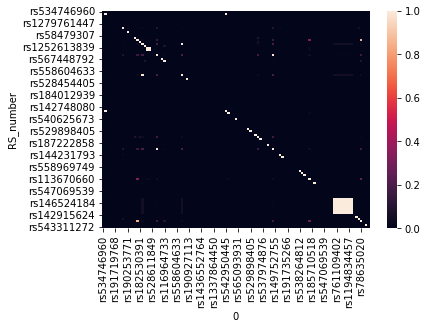

In [9]:
sns.heatmap(ldm)
plt.show()

Also, a genomic area can be feed to Genopyc, it will calculate the pairwise LD between all de rsids in that area.

In [18]:
pwld = gp.PairwiseLD(7,32860000,32870000)
pwld

,v1,v2,r2
8,rs1045477,rs752730,0.139342
4,rs111304378,rs41525144,0.051006
6,rs111304378,rs4720083,0.455366
0,rs113752499,rs113670660,0.061955
11,rs117073274,rs116964733,0.082421
7,rs2392152,rs62467364,0.192598
2,rs35227378,rs113752499,0.763641
10,rs41525144,rs2392152,0.143400
9,rs4720083,rs2392152,0.192598
1,rs564144630,rs531226249,1.000000


Lastly, given a specific rsid we can detect all the variants that are in LD above a certain treshold with it. In the following we will retrieve all the variants in LD $\geq$ 0.8 with rs6792369

In [3]:
variants_in_LD = gp.get_variants_in_LD("rs6792369",r2 = 0.8)
variants_in_LD[:10]

['rs7653028',
 'rs2230535',
 'rs2239551',
 'rs112860674',
 'rs2336146',
 'rs2071508',
 'rs35107891',
 'rs77146033',
 'rs1014969',
 'rs35526119']

# Retrieve genes associated to GWAS loci exploiting [Open Target L2G pipeline](https://genetics-docs.opentargets.org/our-approach/prioritising-causal-genes-at-gwas-loci-l2g)

In [6]:
variants_to_study = variants[0:10]
variants_to_study


['rs144366570',
 'rs13116936',
 'rs7810893',
 'rs10644111',
 'rs2532263',
 'rs11264454',
 'rs142890050',
 'rs4702131',
 'rs140842923',
 'rs11205303']

## Convert the variants in the right format


In [10]:
variants_to_study_ot = gp.ConvertVariantsForOT(variants_to_study,source='rsid',target = 'variantid')
variants_to_study_ot=list(filter(None,variants_to_study_ot))
variants_to_study_ot

list index out of range Couldn't Convert Variant rs144366570
list index out of range Couldn't Convert Variant rs142890050


['4_121205653_G_T',
 '7_12721416_T_C',
 '7_92022864_A_AAAC',
 '17_46175102_G_A',
 '1_156183252_A_G',
 '5_16233510_T_C',
 '6_157009956_C_T',
 '1_149934520_T_C']

In [16]:
results_OT = gp.OT_L2G(variants_to_study_ot,output='all')

In [19]:
list(results_OT.items())[0]


('4_121205653_G_T',
 [('ENSG00000138738', 0.026559356136820922),
  ('ENSG00000164111', 0),
  ('ENSG00000050730', 0.17947686116700198),
  ('ENSG00000173376', 0.059758551307847074),
  ('ENSG00000186867', 0.03983903420523138)])